In [1]:
# imports
import numpy as np
import pandas as pd

# modelling
from sklearn.datasets import load_digits
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

# Tree Visualization
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter

Dataset split: 60000 train rows 60000 test rows
Dataset split: 10000 train rows 10000 test rows


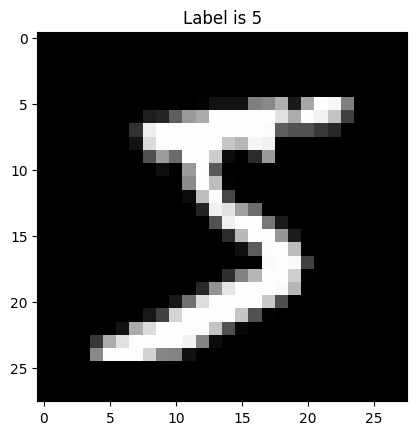

In [2]:
# Initialize
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# digits = load_digits()
print(f"Dataset split: {len(x_train)} train rows",
          f"{len(y_train)} test rows")
print(f"Dataset split: {len(x_test)} train rows",
          f"{len(y_test)} test rows")

point = np.array(x_train[0], dtype='uint8')
point = point.reshape((28, 28))

plt.title('Label is {label}'.format(label=y_train[0]))
plt.imshow(point, cmap='gray')
plt.show()

In [3]:
# normalize data
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

nsamples_train, nx_train, ny_train = x_train.shape
nsamples_test, nx_test, ny_test = x_test.shape

x_train = x_train.reshape((nsamples_train, nx_train * ny_train))
x_test = x_test.reshape((nsamples_test, nx_test * ny_test))

In [4]:
# Add outliers
df = pd.DataFrame()
print("Training set")
print(x_train.shape)
print(y_train.shape)

print("Test set")
print(x_test.shape)
print(y_test.shape)

Training set
(60000, 784)
(60000,)
Test set
(10000, 784)
(10000,)


In [20]:
model = LocalOutlierFactor(n_neighbors=15, contamination='auto')

model.fit(x_train)

LocalOutlierFactor(n_neighbors=15)

In [21]:
df['labels'] = y_test
df['anomalies'] = model.fit_predict(x_test)
df.head(10)

,labels,anomalies
0,7,1
1,2,1
2,1,1
3,0,1
4,4,1
5,1,1
6,4,1
7,9,1
8,5,1
9,9,1


In [22]:
print(df['anomalies'])
anomalies = df.loc[df['anomalies'] == -1]
anomaly_index = x_test[anomalies]

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: anomalies, Length: 10000, dtype: int32
      labels  anomalies
43         2         -1
97         7         -1
149        2         -1
195        3         -1
300        4         -1
...      ...        ...
9700       2         -1
9744       8         -1
9831       5         -1
9853       5         -1
9858       6         -1

[130 rows x 2 columns]


In [23]:
lof = model.negative_outlier_factor_ 
thresh = np.quantile(lof, .05)
print(thresh)

-1.216222870349884


In [24]:
# Count how many anomalies
anomalies = df.loc[lof <= thresh]
anomaly_index = x_test[anomalies]

print(anomaly_index)
print(anomalies)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
      labels  anomalies
8          5          1
14         1          1
36         7          1
38         2          1
43         2         -1
...      ...        ...
9877       5          1
9915       4          1
9944       3          1
9947       4          1
9980       2          1

[500 rows x 2 columns]


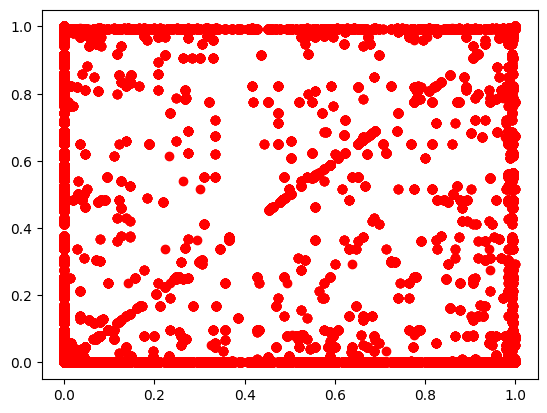

In [27]:
plt.scatter(anomaly_index[:,0], anomaly_index[:,1], color='r')
plt.show()

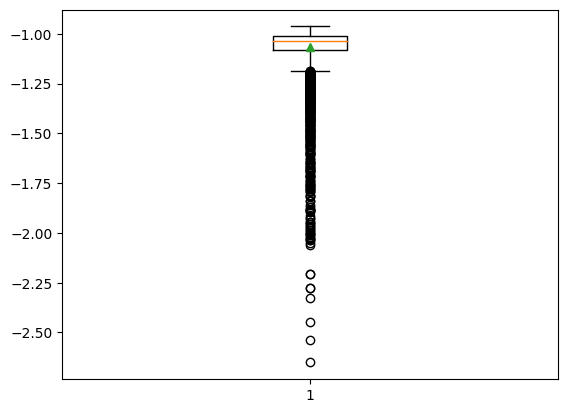

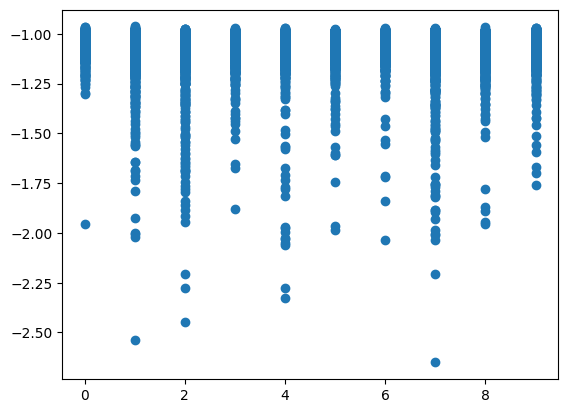

In [28]:
plt.boxplot(lof, showmeans=True, showfliers=True)
plt.show()

plt.scatter(df['labels'], lof)
plt.show()